# Problem Statement

3.	Build a Decision Tree & Random Forest model on the fraud data. Treat those who have taxable_income <= 30000 as Risky and others as Good (Discrete the taxable income column)

-------------------- ##### -----------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams['figure.figsize'] = (10,15)

In [3]:
data = pd.read_csv('Fraud_check.csv')
data.shape

(600, 6)

We have 600 rows and 6 columns in our dataset

Lets explore our dataset

In [4]:
data.columns

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban'],
      dtype='object')

In [5]:
data.dtypes

Undergrad          object
Marital_Status     object
Taxable_Income      int64
City_Population     int64
Work_Experience     int64
Urban              object
dtype: object

Lets check for any missing value in our dataset

<AxesSubplot:>

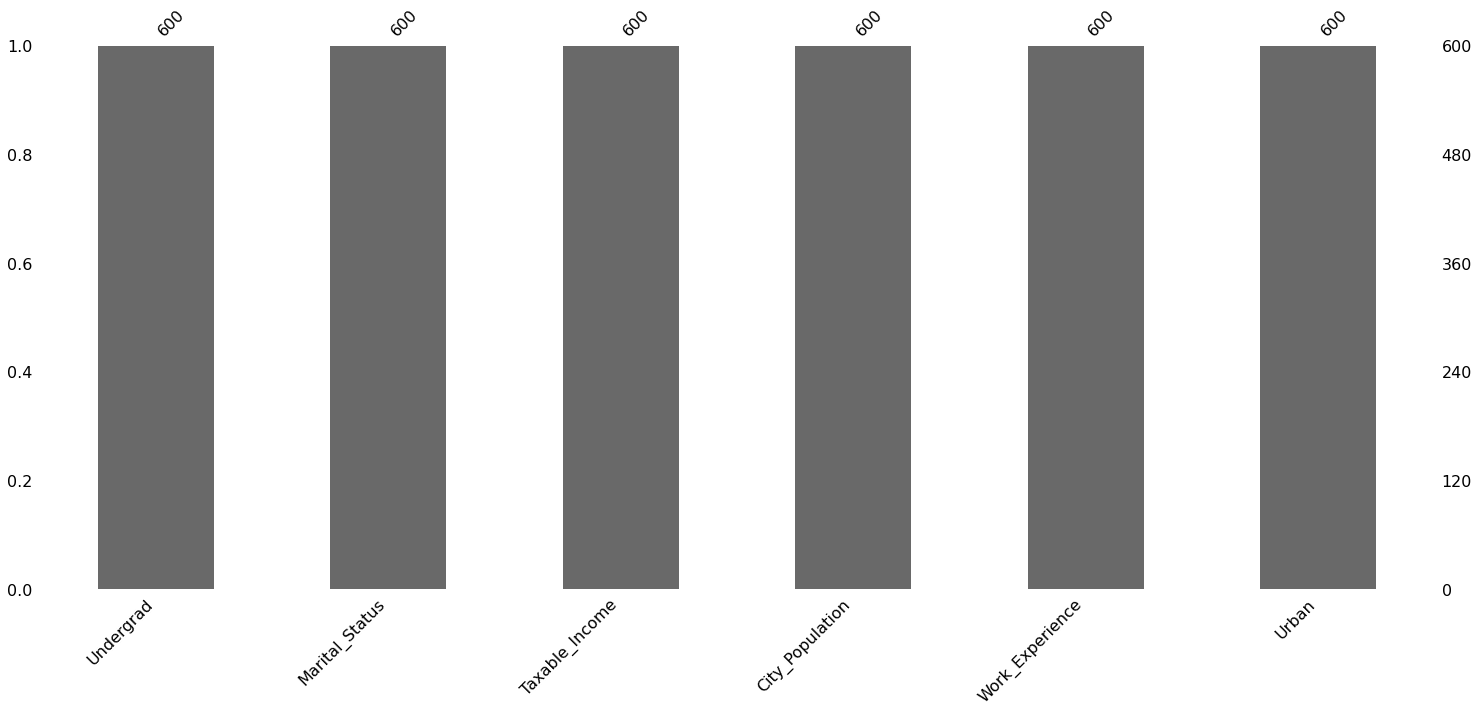

In [6]:
msno.bar(data)

There are no missing values in our dataset

In [8]:
data.describe(include='all')

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [9]:
data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [10]:
data['Marital_Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64

In [11]:
data['Work_Experience'].value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work_Experience, dtype: int64

In [12]:
data['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

array([[<AxesSubplot:title={'center':'Taxable_Income'}>,
        <AxesSubplot:title={'center':'City_Population'}>],
       [<AxesSubplot:title={'center':'Work_Experience'}>, <AxesSubplot:>]],
      dtype=object)

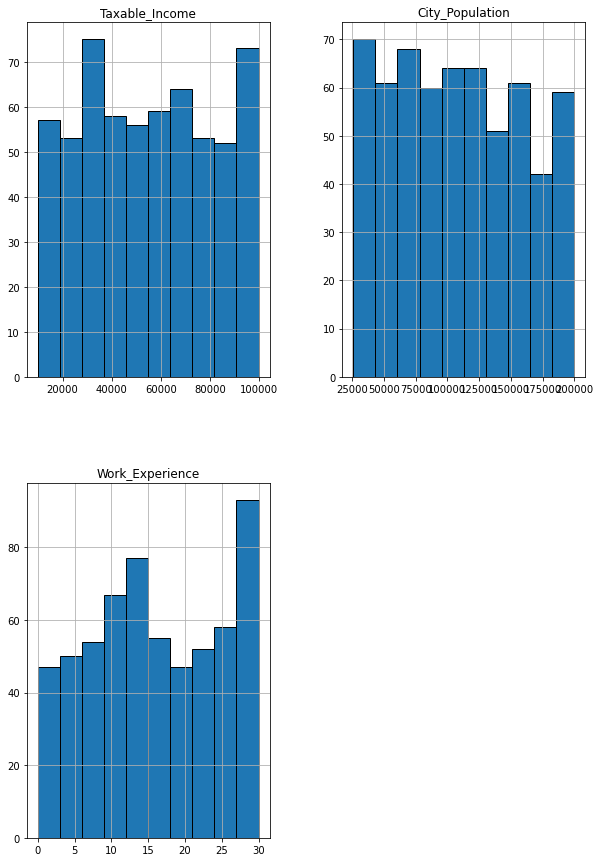

In [13]:
data.hist(edgecolor='black')

As per the requirement, we need to Transform our Taxable Income values to as follows:

- <= 30000 then Risky
- > 30000 then Good

Lets transform the column and build DT model

In [16]:
data['Risk_Category'] = np.where(data['Taxable_Income'] <=30000,"Risky","Good")
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Risk_Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [17]:
data['Risk_Category'].value_counts()

Good     476
Risky    124
Name: Risk_Category, dtype: int64

Now we have categorised our Taxable Income column, we can drop this column from our dataset

In [22]:
data = data.drop('Taxable_Income', axis=1)

In [23]:
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [34]:
data['Undergrad'] = lb.fit_transform(data['Undergrad'])
data['Marital_Status'] = lb.fit_transform(data['Marital_Status'])
data['Urban'] = lb.fit_transform(data['Urban'])
data['Risk_Category'] = lb.fit_transform(data['Risk_Category'])

In [36]:
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Risk_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Lets build DT Models

In [37]:
colnames = list(data.columns)

In [38]:
predictors = colnames[:5]
target = colnames[-1]

In [39]:
predictors

['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience', 'Urban']

In [40]:
target

'Risk_Category'

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [42]:
from sklearn.tree import DecisionTreeClassifier as DT

In [43]:
model = DT(criterion = 'entropy')
model.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy')

In [44]:
# Prediction on Train Data
preds = model.predict(train[predictors])
pd.crosstab(train[target], preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,0,1
Actual,,
0,334,0
1,0,86


In [45]:
# prediction on Test data
preds = model.predict(test[predictors])
pd.crosstab(test[target], preds, rownames=['Actual'], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,106,36
1,30,8


In [46]:
np.mean(preds==test[target]) # Test Data Accuracy

0.6333333333333333

Lets Prune model

In [47]:
predictors = data.loc[:,data.columns!='Risk_Category']
target = data['Risk_Category']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(420, 5) (180, 5) (420,) (180,)


In [49]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)
regtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [50]:
# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [51]:
# Measuring accuracy
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# Error on train dataset
mean_squared_error(y_train, train_pred)
r2_score(y_train, train_pred)

0.07390901571151998

In [53]:
# Error on test dataset
mean_squared_error(y_test, test_pred)
r2_score(y_test, test_pred)

-0.1158650815572213

In [54]:
regtree = tree.DecisionTreeRegressor(max_depth=4)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.15027726537769578
Train Error 0.10744412078701904
Test Error 0.1784499053367237
Test Error -0.16474152556604493


In [55]:
regtree = tree.DecisionTreeRegressor(max_depth=5)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.1404751617658648
Train Error 0.16566267557243952
Test Error 0.1917331413169802
Test Error -0.2514411318835934


In [57]:
regtree = tree.DecisionTreeRegressor(max_depth=6)
regtree.fit(x_train,y_train)

# Prediction
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

# Error on train dataset
print("Train Error",mean_squared_error(y_train, train_pred))
print("Train Error",r2_score(y_train, train_pred))

# Error on test dataset
print("Test Error",mean_squared_error(y_test, test_pred))
print("Test Error",r2_score(y_test, test_pred))

Train Error 0.13147781343371565
Train Error 0.21910147172702232
Test Error 0.19510257874104117
Test Error -0.2734334309447488


Min Sample Split

In [58]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 3)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.014285714285714285
Train Error with R2 0.9151515151515152
Test Error with Mean Square 0.3
Test Error with R2 -0.958098307816277


In [59]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 4)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.03611111111111111
Train Error with R2 0.7855218855218855
Test Error with Mean Square 0.26558641975308644
Test Error with R2 -0.73348106365834


In [60]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 5)
regtree2.fit(x_train, y_train)

# Prediction
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

# Error on train dataset
print("Train Error with Mean Square",mean_squared_error(y_train, train_pred2))
print("Train Error with R2",r2_score(y_train, train_pred2))

# Error on test dataset
print("Test Error with Mean Square",mean_squared_error(y_test, test_pred2))
print("Test Error with R2",r2_score(y_test, test_pred2))

Train Error with Mean Square 0.04682539682539684
Train Error with R2 0.7218855218855218
Test Error with Mean Square 0.2720679012345679
Test Error with R2 -0.7757856567284449


Min Sample Leaf Method

In [61]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.07694444444444445
Train Error with R2 0.5429966329966329
Test Error with Mean Squared 0.23775000000000002
Test Error with R2 -0.5517929089443996


In [62]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 4)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.09443877551020408
Train Error with R2 0.4390909090909092
Test Error with Mean Squared 0.23599077223481985
Test Error with R2 -0.5403104392441909


In [63]:
## Minimum observations at the leaf node approach
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 5)
regtree3.fit(x_train, y_train)

# Prediction
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

# measure of error on train dataset
print("Train Error with Mean Squared",mean_squared_error(y_train, train_pred3))
print("Train Error with R2",r2_score(y_train, train_pred3))

# measure of error on test dataset
print("Test Error with Mean Squared",mean_squared_error(y_test, test_pred3))
print("Test Error with R2",r2_score(y_test, test_pred3))

Train Error with Mean Squared 0.10531651549508693
Train Error with R2 0.37448372615039294
Test Error with Mean Squared 0.21432727597211726
Test Error with R2 -0.3989129213329168


Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_clf = RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

In [66]:
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
print(confusion_matrix(y_test, rf_clf.predict(x_test)))
print(accuracy_score(y_test, rf_clf.predict(x_test)))

[[133  13]
 [ 34   0]]
0.7388888888888889


Grid Search

In [69]:
# Grid Search
from sklearn.model_selection import GridSearchCV

rf_clf_grid = RandomForestClassifier(n_estimators=600, n_jobs=1, random_state=42)

param_grid = {"max_features": [4, 5, 6, 7, 8, 9, 10], "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(rf_clf_grid, param_grid, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_

cv_rf_clf_grid = grid_search.best_estimator_

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, cv_rf_clf_grid.predict(x_test))
accuracy_score(y_test, cv_rf_clf_grid.predict(x_test))

C:\Users\jaich\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.73571429 0.74285714 0.76904762 0.73333333 0.73809524 0.76428571
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
  warnings.warn(


0.7833333333333333

From the above exercise we can say if we do Grid Search we best accuracy of 0.78 % on our Test data